In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import sklearn as sk
from sklearn.linear_model import LinearRegression
import statistics
import geopandas
from matplotlib.animation import FuncAnimation
from IPython.core.display import HTML
from time import time

In [3]:
cr = pd.read_csv("Cancer Rates.csv") 
cr["Leading Cancer Sites"].unique()

array(['Brain and Other Nervous System', 'Breast', 'Cervix Uteri',
       'Colon and Rectum', 'Corpus Uteri', 'Esophagus', 'Gallbladder',
       'Kidney and Renal Pelvis', 'Larynx', 'Leukemias', 'Liver',
       'Lung and Bronchus', 'Melanoma of the Skin', 'Myeloma',
       'Non-Hodgkin Lymphoma', 'Oral Cavity and Pharynx', 'Ovary',
       'Pancreas', 'Prostate', 'Stomach', 'Thyroid', 'Urinary Bladder'],
      dtype=object)

In [4]:
us = geopandas.read_file("zip://states.zip")
us.set_index("STUSPS", drop=False, inplace=True)

def draw_map(cancer, year):
    cmapdict={}
    
    #load and clean cancer rate dataset
    cr = pd.read_csv("Cancer Rates.csv")  
    cr = cr.dropna()
    cr = cr.reset_index(drop=True)
    cr["Incidence Age-Adjusted Rate (per 100,000)"] = cr["Incidence Age-Adjusted Rate (per 100,000)"].astype('float')
    cr["Year"] = cr["Year"].astype('int')
    
    #sort based on type of cancer and year
    cr = cr[cr["Leading Cancer Sites"] == cancer]
    cr = cr[cr["Year"] == year]
    cr = cr.reset_index(drop=True)
    cr["cmap"]=cr["Incidence Age-Adjusted Rate (per 100,000)"]#/250
    for state in range(len(cr["State"])):
        cmapdict[cr["State"][state]] = cr["cmap"][state]
    
    #load us map dataset
    us = geopandas.read_file("zip://states.zip")
    us.set_index("STUSPS", drop=False, inplace=True)
    
    #add color map values to us map dataset
    vals = []
    for row in range(len(us)):
        try:
            val = cmapdict[us["NAME"][row]]
            vals.append(val)
        except:
            vals.append(0)
    us["cmap"] = vals
    
    #separate AK, HI; drop PR
    continent = us[~us["STUSPS"].isin(["AK", "HI", "PR"])]
    ak = us.loc["AK":"AK"]
    hi = us.loc["HI":"HI"]
    
    #plot map
    continent.plot(column = "cmap", cmap = "Purples", edgecolor="k", ax=ax1)
    plt.title("Incidence Rates for "+cancer +", " +str(year),fontsize = 15)
    ak.plot(column = "cmap", cmap = "Purples", edgecolor="k", ax=ax2)
    hi.plot(column = "cmap", cmap = "Purples", edgecolor="k", ax=ax3)
    ax2.set_xlim(-180, -120)
    
    for ax in fig.axes:
        ax.axis("off")
    return 



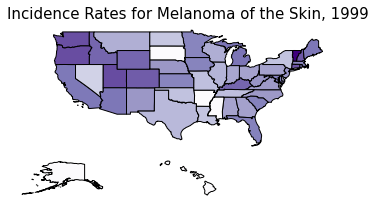

In [5]:

fig = plt.figure()
gs = fig.add_gridspec(5, 3)


ax2 = fig.add_subplot(gs[3, 0])
ax3 = fig.add_subplot(gs[3, 1])
ax1 = fig.add_subplot(gs[:3, :])

draw_map("Melanoma of the Skin",1999)

In [6]:
#Leukemia Incidence Rates

def draw_frame(frame_num):
    year = 1999 + frame_num
    draw_map("Leukemias", year)


fig = plt.figure()
gs = fig.add_gridspec(5, 3)

ax2 = fig.add_subplot(gs[3, 0])
ax3 = fig.add_subplot(gs[3, 1])
ax1 = fig.add_subplot(gs[:3, :])
    
anim = FuncAnimation(fig, draw_frame, frames=18, interval=500)
html = anim.to_html5_video()
plt.close(fig)
HTML(html)

In [7]:
#Prostate Incidence Rates

def draw_frame1(frame_num):
    year = 1999 + frame_num
    draw_map("Prostate", year)

fig = plt.figure()
gs = fig.add_gridspec(5, 3)

ax2 = fig.add_subplot(gs[3, 0])
ax3 = fig.add_subplot(gs[3, 1])
ax1 = fig.add_subplot(gs[:3, :])
    
anim = FuncAnimation(fig, draw_frame1, frames=18, interval=500)
html = anim.to_html5_video()
plt.close(fig)
HTML(html)

In [8]:
#Melanoma Incidence Rates

def draw_frame2(frame_num):
    year = 1999 + frame_num
    draw_map("Melanoma of the Skin", year)

fig = plt.figure()
gs = fig.add_gridspec(5, 3)

ax2 = fig.add_subplot(gs[3, 0])
ax3 = fig.add_subplot(gs[3, 1])
ax1 = fig.add_subplot(gs[:3, :])
    
anim = FuncAnimation(fig, draw_frame2, frames=18, interval=500)
html = anim.to_html5_video()
plt.close(fig)
HTML(html)

In [9]:
#mortality-incidence ratio

def draw_map1(cancer, year):
    cmapdict={}
    
    #load and clean cancer rate dataset
    cr = pd.read_csv("Cancer Rates.csv")  
    for idx, row in cr.iterrows():
        if "Unreliable" in row["Mortality-Incidence Age-Adjusted Rate Ratio"]:
            cr = cr.drop(idx)
    cr = cr.dropna()
    cr = cr.reset_index(drop=True)
    cr["Mortality-Incidence Age-Adjusted Rate Ratio"] = cr["Mortality-Incidence Age-Adjusted Rate Ratio"].astype('float')
    cr["Year"] = cr["Year"].astype('int')
    
    #sort based on type of cancer and year
    cr = cr[cr["Leading Cancer Sites"] == cancer]
    cr = cr[cr["Year"] == year]
    cr = cr.reset_index(drop=True)
    cr["cmap"]=cr["Mortality-Incidence Age-Adjusted Rate Ratio"]#/250
    for state in range(len(cr["State"])):
        cmapdict[cr["State"][state]] = cr["cmap"][state]
    
    #load us map dataset
    us = geopandas.read_file("zip://states.zip")
    us.set_index("STUSPS", drop=False, inplace=True)
    
    #add color map values to us map dataset
    vals = []
    for row in range(len(us)):
        try:
            val = cmapdict[us["NAME"][row]]
            vals.append(val)
        except:
            vals.append(0)
    us["cmap"] = vals
    
    #separate AK, HI; drop PR
    continent = us[~us["STUSPS"].isin(["AK", "HI", "PR"])]
    ak = us.loc["AK":"AK"]
    hi = us.loc["HI":"HI"]
    
    #plot map
    continent.plot(column = "cmap", cmap = "Purples", edgecolor="k", ax=ax1)
    plt.title("Mortality-Incidence Rates for "+cancer +", " +str(year),fontsize = 15)
    ak.plot(column = "cmap", cmap = "Purples", edgecolor="k", ax=ax2)
    hi.plot(column = "cmap", cmap = "Purples", edgecolor="k", ax=ax3)
    ax2.set_xlim(-180, -120)
    
    for ax in fig.axes:
        ax.axis("off")
    return 


In [10]:
#Leukemia Mortality-Incidence Rates

def draw_frame(frame_num):
    year = 1999 + frame_num
    draw_map1("Leukemias", year)


fig = plt.figure()
gs = fig.add_gridspec(5, 3)

ax2 = fig.add_subplot(gs[3, 0])
ax3 = fig.add_subplot(gs[3, 1])
ax1 = fig.add_subplot(gs[:3, :])
    
anim = FuncAnimation(fig, draw_frame, frames=18, interval=500)
html = anim.to_html5_video()
plt.close(fig)
HTML(html)

In [11]:
#Prostate Mortality-Incidence Rates

def draw_frame1(frame_num):
    year = 1999 + frame_num
    draw_map1("Prostate", year)

fig = plt.figure()
gs = fig.add_gridspec(5, 3)

ax2 = fig.add_subplot(gs[3, 0])
ax3 = fig.add_subplot(gs[3, 1])
ax1 = fig.add_subplot(gs[:3, :])
    
anim = FuncAnimation(fig, draw_frame1, frames=18, interval=500)
html = anim.to_html5_video()
plt.close(fig)
HTML(html)

In [12]:
#Melanoma Mortality-Incidence Rates

def draw_frame2(frame_num):
    year = 1999 + frame_num
    draw_map("Melanoma of the Skin", year)

    
fig = plt.figure()
gs = fig.add_gridspec(5, 3)

ax2 = fig.add_subplot(gs[3, 0])
ax3 = fig.add_subplot(gs[3, 1])
ax1 = fig.add_subplot(gs[:3, :])
    
anim = FuncAnimation(fig, draw_frame2, frames=18, interval=500)
html = anim.to_html5_video()
plt.close(fig)
HTML(html)